In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [2]:
df = pd.read_csv('advertising.csv')

In [3]:
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [4]:
df.tail(10)

,TV,Radio,Newspaper,Sales
190,39.5,41.1,5.8,10.8
191,75.5,10.8,6.0,11.9
192,17.2,4.1,31.6,5.9
193,166.8,42.0,3.6,19.6
194,149.7,35.6,6.0,17.3
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
df.shape

(200, 4)

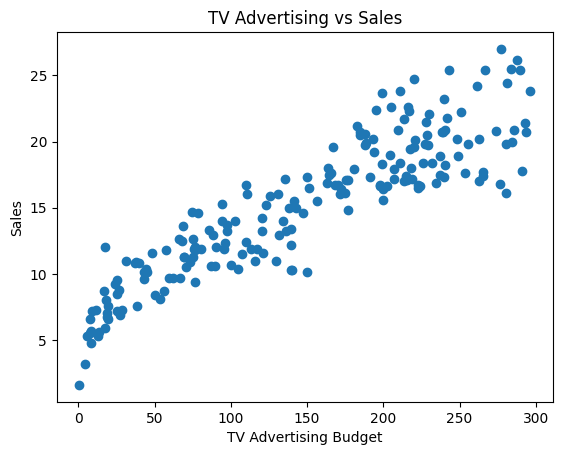

In [10]:
plt.scatter(df['TV'], df['Sales'])
plt.title('TV Advertising vs Sales')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.show()

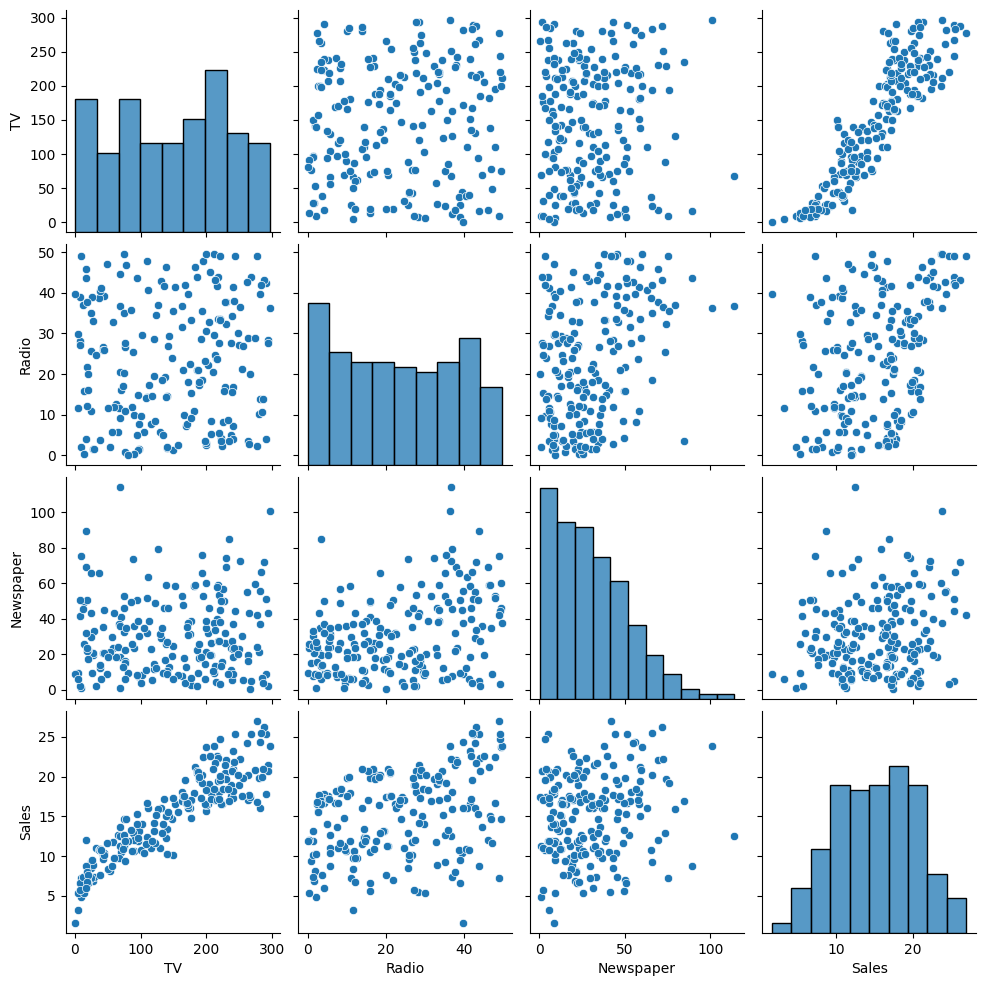

In [11]:
sns.pairplot(df[['TV', 'Radio', 'Newspaper', 'Sales']])
plt.show()

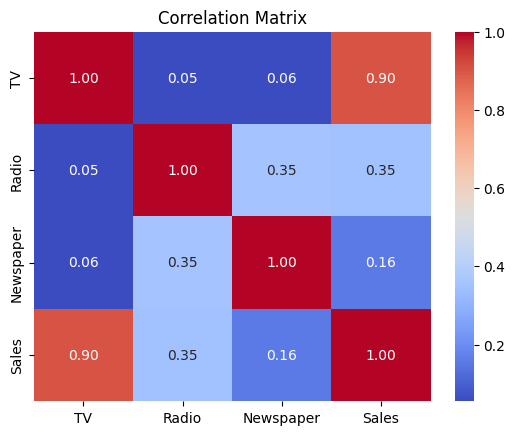

In [12]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [13]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)

In [18]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 2.9077569102710896
R-squared: 0.9059011844150826


In [22]:
print(len(X_test), len(y_test))

40 40


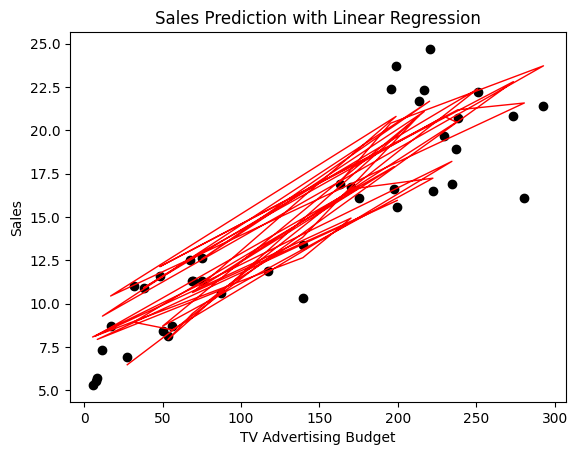

In [28]:
plt.scatter(X_test['TV'], y_test, color='black')  # Assuming 'TV' is the feature you want to plot
plt.plot(X_test['TV'], y_pred, color='red', linewidth=1)
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.title('Sales Prediction with Linear Regression')
plt.show()

In exploring the advertising dataset, I conducted a thorough analysis to understand the relationships between advertising channels ('TV,' 'Radio,' 'Newspaper') and their impact on sales. Utilizing visualizations such as scatter plots and pair plots, I uncovered patterns that highlighted the varying degrees of influence each channel has on sales. The correlation matrix and heatmap further illuminated the strengths of these relationships, with 'TV' exhibiting a notably stronger positive correlation with sales compared to the other channels. Following this analysis, a linear regression model was trained to predict sales based on advertising expenditures. The model's performance, evaluated using metrics like Mean Squared Error and R-squared, indicated a reasonably effective prediction capability. However, it's essential to consider potential improvements and delve deeper into feature engineering to enhance the model's accuracy. Overall, this investigation provides valuable insights into the dynamics between advertising strategies and sales outcomes, setting the foundation for further refinement and optimization in the pursuit of effective business strategies.